<a href="https://colab.research.google.com/github/Sonaljothylingam/Handwriting_Classification/blob/main/Handwriting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline  # your matplotlib graphs will be included in your notebook, next to the code
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()  # Loads the MNIST dataset and splits the data

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train) #no. of train dataset

60000

In [ ]:
len(X_test) #no. of test dataset

10000

In [ ]:
X_train[0].shape  #shape of first image.here 28 x 28 pixel

(28, 28)

In [ ]:

X_train[0] 
# weights represented in nubmers is a simple 2d array 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

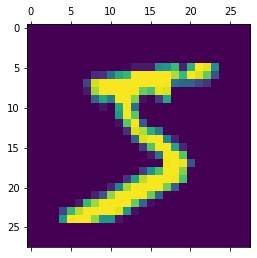

In [ ]:

plt.matshow(X_train[0]) #actual image can be seen using matplotlib library
#plotting first image of training set

In [ ]:
y_train[0] #the first element is 5

5

In [ ]:
X_train = X_train / 255     #dividing each image's pixel value by 255 to get the pixel value between 0 and 1
X_test = X_test / 255       #scaling : improves value of accuracy in ml model

In [ ]:

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) #first image of number represented as arrays i.e we are flatenning 28*28 which be omes a single array of 784 neurons
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape #784=28*28. Each pixel is a feature here

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')        #10 is the output shape. 0-9 = 10 neurons. 
])                                                                          #dense because all neurons in one layer are connected to all other neurons in the succeding layer
                                                                            # Dense: cause it is an MLP

model.compile(optimizer='adam',  #optimizers allow you to train efficiently especially during Back Propogation
              loss='sparse_categorical_crossentropy',  #loss function. Output class is categorical {0-9}. sparse : y-train is an integer number.
              metrics=['accuracy'])  #goal is to make it more accurate

model.fit(X_train_flattened, y_train, epochs=5) # Training actually happens here
                                                #epoch= no.. of iterations nn runs the train

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4718 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [ ]:
model.evaluate(X_test_flattened, y_test)  # evaluating accuracy on a test dataset

313/313 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9256


[0.26705628633499146, 0.925599992275238]

In [ ]:
y_predicted = model.predict(X_test_flattened)


In [ ]:
y_predicted[0] #printing the probability distribution

array([1.6001731e-02, 2.3462979e-07, 5.4071158e-02, 9.1035807e-01,
       1.5379488e-03, 8.8697642e-02, 1.3265570e-06, 9.9979794e-01,
       7.3655635e-02, 6.1525905e-01], dtype=float32)

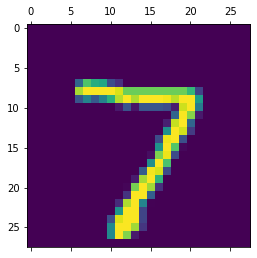

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])  #finds the maximum value from the probability distribution of the first image and prints the index.

7

In [ ]:
y_predicted[1]

array([1.8476388e-01, 2.7411580e-03, 9.9950683e-01, 2.7010354e-01,
       4.3641177e-10, 8.4662157e-01, 8.5219818e-01, 1.2024533e-12,
       1.2807605e-01, 2.3178859e-09], dtype=float32)

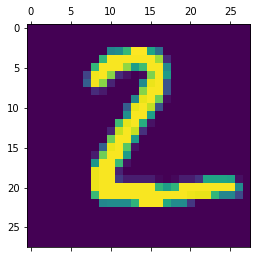

In [ ]:
plt.matshow(X_test[1])

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
#confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    3,    1,    0,    6,    8,    4,    2,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    7,  935,   13,    7,    5,   11,   12,   35,    4],
       [   2,    0,   26,  903,    0,   33,    2,   14,   19,   11],
       [   2,    1,    5,    0,  908,    0,    9,    4,    9,   44],
       [   7,    2,    4,   23,    6,  797,   14,    7,   24,    8],
       [  11,    3,    7,    1,    8,   16,  907,    2,    3,    0],
       [   1,    5,   22,    4,    5,    1,    0,  955,    2,   33],
       [   5,    7,    6,   17,    9,   34,   10,   14,  861,   11],
       [  10,    6,    1,    7,   20,    6,    0,   26,    7,  926]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

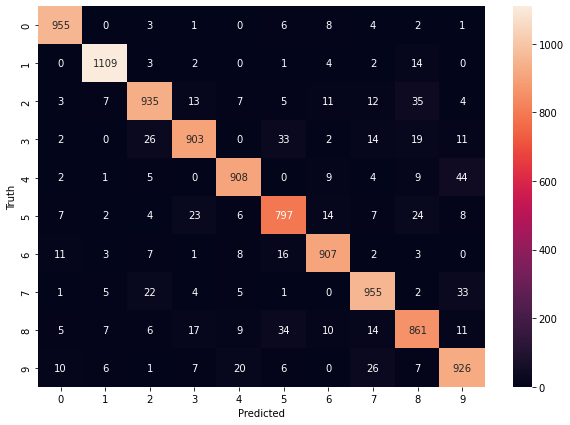

In [ ]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#black is the number of erors and diagonal is correct

In [ ]:
#adding a hidden layer. Hidden layer improves the accuracy
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #the hidden layer should have 100 neurons. Its just trial and error
    keras.layers.Dense(10, activation='sigmoid')          #it will figure out the input shape on its own 
])                                                                         
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2694 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1237 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0867 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0671 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0527 - accuracy: 0.9833


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0775 - accuracy: 0.9762


[0.07753738760948181, 0.9761999845504761]

Text(69.0, 0.5, 'Truth')

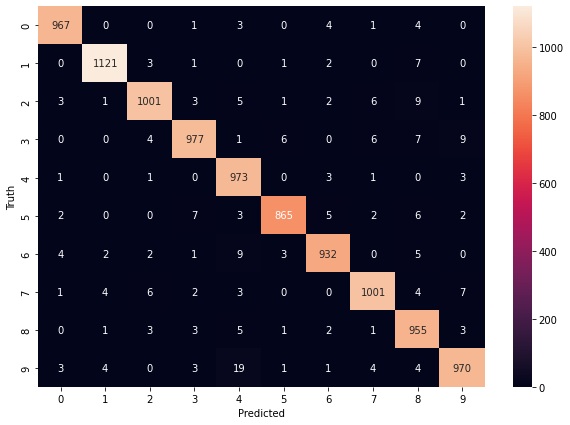

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#using flatten method in keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'), #the hidden layer should have 100 neurons. Its just trial and error
    keras.layers.Dense(10, activation='sigmoid')          #it will figure out the input shape on its own 
])                                                                         
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2800 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1272 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0887 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0525 - accuracy: 0.9841


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9768


[0.07620801031589508, 0.9768000245094299]